In [13]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
pd.set_option('display.max_seq_items', None)
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
wec = pd.read_csv(r'..\\datasets\\World_Energy_Consumption.csv')  

In [15]:
forma = wec.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 17432 filas y 122 columnas'

In [16]:
dupl = wec.duplicated()
print(dupl.value_counts())

False    17432
dtype: int64


In [17]:
print(wec.columns)

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct', 'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct', 'energy_cons_change_twh', 'biofuel_share_elec',
       'biofuel_elec_per_capita', 'biofuel_cons_change_pct', 'biofuel_share_energy', 'biofuel_cons_change_twh', 'biofuel_consumption',
       'biofuel_cons_per_capita', 'carbon_intensity_elec', 'coal_share_elec', 'coal_cons_change_pct', 'coal_share_energy', 'coal_cons_change_twh',
       'coal_consumption', 'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production', 'coal_prod_per_capita', 'electricity_generation',
       'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity',
       'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity',
       'wind_electricity', 'energ

In [18]:
# Se observan cuántos valores faltantes tiene cada columna:
missing_values = wec.isnull().sum().sort_values(ascending = False) 
        # datos faltantes ordenados de mayor a menor
        # según la columna
missing_values

biofuel_cons_change_pct                    16913
carbon_intensity_elec                      16844
solar_cons_change_pct                      16107
nuclear_cons_change_pct                    15910
wind_cons_change_pct                       15889
other_renewables_cons_change_pct           15106
hydro_cons_change_pct                      13768
gas_cons_change_pct                        13728
coal_cons_change_pct                       13670
renewables_cons_change_pct                 13604
low_carbon_cons_change_pct                 13597
biofuel_elec_per_capita                    13243
fossil_cons_change_pct                     13231
oil_cons_change_pct                        13231
oil_cons_change_twh                        13231
fossil_cons_change_twh                     13231
biofuel_share_elec                         13226
low_carbon_cons_change_twh                 13225
coal_cons_change_twh                       13225
nuclear_cons_change_twh                    13225
other_renewables_con

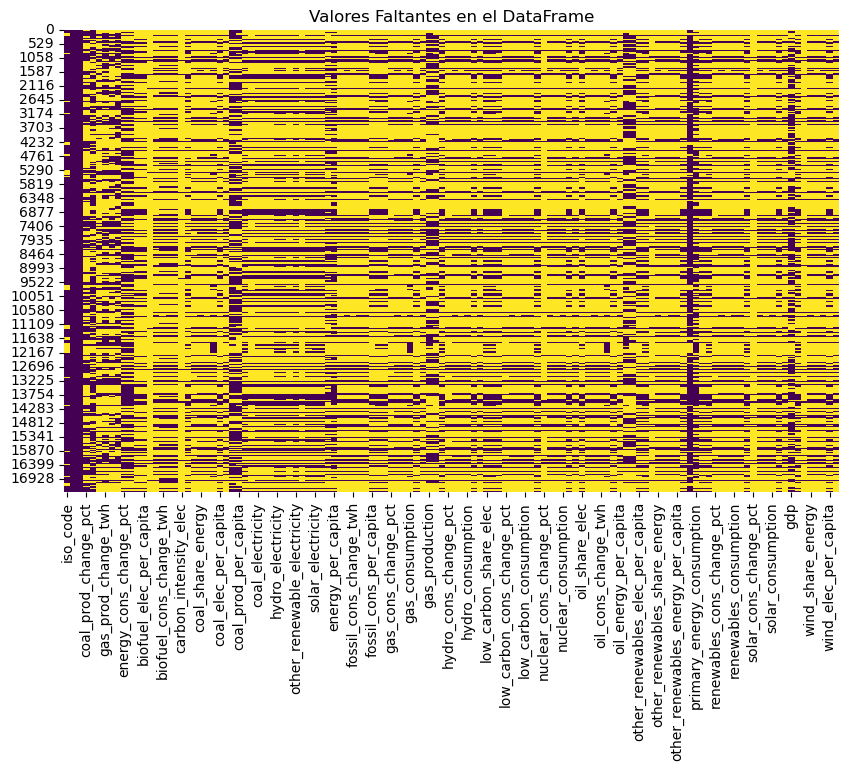

In [19]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [20]:
# Se creará un nuevo dataframe filtrando por el valor de la columna tipo (película)
latam = latam[(latam['iso_code'] == "ARG") | (wec['iso_code'] == "ECU") | (wec['iso_code'] == "GUY") | (wec['iso_code'] == "PER") | (wec['iso_code'] == "GUF") |(wec['iso_code'] == "URY") | (wec['iso_code'] == "PRY") | (wec['iso_code'] == "BOL")  | (wec['iso_code'] == "SUR")  | (wec['iso_code'] == "TTO") | (wec['iso_code'] == "BRA")| (wec['iso_code'] == "CHL") | (wec['iso_code'] == "COL") | (wec['iso_code'] == "VEN")]
latam = latam[(latam['year'] > 1969)]
latam.shape ## Se verifica la cantidad de fila

NameError: name 'latam' is not defined

In [21]:
wec.head(5)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508

## Columns and their description
column 	description
iso_code 	ISO 3166-1 alpha-3 three-letter country codes
country 	Geographic location
year 	Year of observation
coal_prod_change_pct 	Annual percentage change in coal production
coal_prod_change_twh 	Annual change in coal production, measured in terawatt-hours
gas_prod_change_pct 	Annual percentage change in gas production
gas_prod_change_twh 	Annual change in gas production, measured in terawatt-hours
oil_prod_change_pct 	Annual percentage change in oil production
oil_prod_change_twh 	Annual change in oil production, measured in terawatt-hours
energy_cons_change_pct 	Annual percentage change in primary energy consumption
energy_cons_change_twh 	Annual change in primary energy consumption, measured in terawatt-hours
biofuel_share_elec 	Share of electricity consumption that comes from biofuels
biofuel_cons_change_pct 	Annual percentage change in biofuel consumption
biofuel_share_energy 	Share of primary energy consumption that comes from biofuels
biofuel_cons_change_twh 	Annual change in biofuel consumption, measured in terawatt-hours
biofuel_consumption 	Primary energy consumption from biofuels, measured in terawatt-hours
biofuel_elec_per_capita 	Per capita electricity consumption from biofuels, measured in kilowatt-hours
biofuel_cons_per_capita 	Per capita primary energy consumption from biofuels, measured in kilowatt-hours
carbon_intensity_elec 	Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour
coal_share_elec 	Share of electricity consumption that comes from coal
coal_cons_change_pct 	Annual percentage change in coal consumption
coal_share_energy 	Share of primary energy consumption that comes from coal
coal_cons_change_twh 	Annual change in coal consumption, measured in terawatt-hours
coal_consumption 	Primary energy consumption from coal, measured in terawatt-hours
coal_elec_per_capita 	Per capita electricity consumption from coal, measured in kilowatt-hours
coal_cons_per_capita 	Per capita primary energy consumption from coal, measured in kilowatt-hours
coal_production 	Coal production, measured in terawatt-hours
coal_prod_per_capita 	Per capita coal production, measured in kilowatt-hours
electricity_generation 	Electricity generation, measured in terawatt-hours
biofuel_electricity 	Electricity generation from biofuels, measured in terawatt-hours
coal_electricity 	Electricity generation from coal, measured in terawatt-hours
fossil_electricity 	Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.
gas_electricity 	Electricity generation from gas, measured in terawatt-hours
hydro_electricity 	Electricity generation from hydropower, measured in terawatt-hours
nuclear_electricity 	Electricity generation from nuclear power, measured in terawatt-hours
oil_electricity 	Electricity generation from oil, measured in terawatt-hours
other_renewable_electricity 	Electricity generation from other renewable sources, measured in terawatt-hours
other_renewable_exc_biofuel_electricity 	Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours
renewables_electricity 	Electricity generation from renewables, measured in terawatt-hours
solar_electricity 	Electricity generation from solar, measured in terawatt-hours
wind_electricity 	Electricity generation from wind, measured in terawatt-hours
energy_per_gdp 	Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$.
energy_per_capita 	Primary energy consumption per capita, measured in kilowatt-hours per year
fossil_cons_change_pct 	Annual percentage change in fossil fuel consumption
fossil_share_energy 	Share of primary energy consumption that comes from fossil fuels
fossil_cons_change_twh 	Annual change in fossil fuel consumption, measured in terawatt-hours
fossil_fuel_consumption 	Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_energy_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_cons_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_share_elec 	Share of electricity consumption that comes from fossil fuels (coal, oil and gas combined)
gas_share_elec 	Share of electricity consumption that comes from gas
gas_cons_change_pct 	Annual percentage change in gas consumption
gas_share_energy 	Share of primary energy consumption that comes from gas
gas_cons_change_twh 	Annual change in gas consumption, measured in terawatt-hours
gas_consumption 	Primary energy consumption from gas, measured in terawatt-hours
gas_elec_per_capita 	Per capita electricity consumption from gas, measured in kilowatt-hours
gas_energy_per_capita 	Per capita primary energy consumption from gas, measured in kilowatt-hours
gas_production 	Gas production, measured in terawatt-hours
gas_prod_per_capita 	Per capita gas production, measured in kilowatt-hours
hydro_share_elec 	Share of electricity consumption that comes from hydropower
hydro_cons_change_pct 	Annual percentage change in hydropower consumption
hydro_share_energy 	Share of primary energy consumption that comes from hydropower
hydro_cons_change_twh 	Annual change in hydropower consumption, measured in terawatt-hours
hydro_consumption 	Primary energy consumption from hydropower, measured in terawatt-hours
hydro_elec_per_capita 	Per capita electricity consumption from hydropower, measured in kilowatt-hours
hydro_energy_per_capita 	Per capita primary energy consumption from hydropower, measured in kilowatt-hours
low_carbon_share_elec 	Share of electricity consumption that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear
low_carbon_electricity 	Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power
low_carbon_elec_per_capita 	Per capita electricity consumption from low-carbon sources, measured in kilowatt-hours
low_carbon_cons_change_pct 	Annual percentage change in low-carbon energy consumption
low_carbon_share_energy 	Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear
low_carbon_cons_change_twh 	Annual change in low-carbon energy consumption, measured in terawatt-hours
low_carbon_consumption 	Primary energy consumption from low-carbon sources, measured in terawatt-hours
low_carbon_energy_per_capita 	Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours
nuclear_share_elec 	Share of electricity consumption that comes from nuclear power
nuclear_cons_change_pct 	Annual percentage change in nuclear consumption
nuclear_share_energy 	Share of primary energy consumption that comes from nuclear power
nuclear_cons_change_twh 	Annual change in nuclear consumption, measured in terawatt-hours
nuclear_consumption 	Primary energy consumption from nuclear power, measured in terawatt-hours
nuclear_elec_per_capita 	Per capita electricity consumption from nuclear power, measured in kilowatt-hours
nuclear_energy_per_capita 	Per capita primary energy consumption from nuclear, measured in kilowatt-hours
oil_share_elec 	Share of electricity consumption that comes from oil
oil_cons_change_pct 	Annual percentage change in oil consumption
oil_share_energy 	Share of primary energy consumption that comes from oil
oil_cons_change_twh 	Annual change in oil consumption, measured in terawatt-hours
oil_consumption 	Primary energy consumption from oil, measured in terawatt-hours
oil_elec_per_capita 	Primary energy consumption from oil, measured in terawatt-hours
oil_energy_per_capita 	Per capita primary energy consumption from oil, measured in kilowatt-hours
oil_production 	Oil production, measured in terawatt-hours
oil_prod_per_capita 	Per capita oil production, measured in kilowatt-hours
other_renewables_elec_per_capita 	Per capita electricity consumption from other renewables, measured in kilowatt-hours
other_renewables_share_elec 	Share of electricity consumption that comes from other renewables
other_renewables_cons_change_pct 	Annual percentage change in energy consumption from other renewables
other_renewables_share_energy 	Share of primary energy consumption that comes from other renewables
other_renewables_cons_change_twh 	Annual change in other renewable consumption, measured in terawatt-hours
other_renewable_consumption 	Primary energy consumption from other renewables, measured in terawatt-hours
other_renewables_energy_per_capita 	Per capita primary energy consumption from other renewables, measured in kilowatt-hours
per_capita_electricity 	Electricity consumption per capita, measured in kilowatt-hours
population 	Total population
primary_energy_consumption 	Primary energy consumption, measured in terawatt-hours
renewables_elec_per_capita 	Per capita primary energy consumption from renewables, measured in kilowatt-hours
renewables_share_elec 	Share of electricity consumption that comes from renewables
renewables_cons_change_pct 	Annual percentage change in renewable energy consumption
renewables_share_energy 	Share of primary energy consumption that comes from renewables
renewables_cons_change_twh 	Annual change in renewable energy consumption, measured in terawatt-hours
renewables_consumption 	Primary energy consumption from renewables, measured in terawatt-hours
renewables_energy_per_capita 	Per capita electricity consumption from renewables, measured in kilowatt-hours
solar_share_elec 	Share of electricity consumption that comes from solar
solar_cons_change_pct 	Annual percentage change in solar consumption
solar_share_energy 	Share of primary energy consumption that comes from solar
solar_cons_change_twh 	Annual change in solar consumption, measured in terawatt-hours
solar_consumption 	Primary energy consumption from solar, measured in terawatt-hours
solar_elec_per_capita 	Per capita electricity consumption from solar, measured in kilowatt-hours
solar_energy_per_capita 	Per capita primary energy consumption from solar, measured in kilowatt-hours
gdp 	Total real gross domestic product, inflation-adjusted
wind_share_elec 	Share of electricity consumption that comes from wind
wind_cons_change_pct 	Annual percentage change in wind consumption
wind_share_energy 	Share of primary energy consumption that comes from wind
wind_cons_change_twh 	Annual change in wind consumption, measured in terawatt-hours
wind_consumption 	Primary energy consumption from wind, measured in terawatt-hours
wind_elec_per_capita 	Per capita electricity consumption from wind, measured in kilowatt-hours
wind_energy_per_capita 	Per capita primary energy consumption from wind, measured in kilowatt-hours

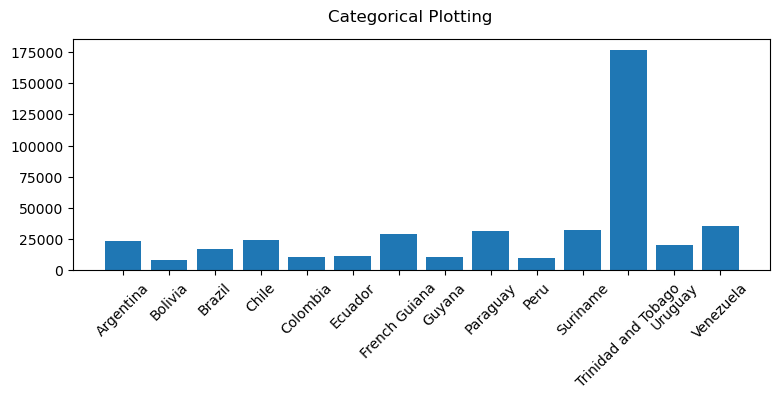

In [ ]:
names = latam["country"]
values = latam["energy_per_capita"]

plt.figure(figsize=(9, 3))

# plt.subplot(131)
plt.bar(names, values)
# plt.subplot(132)
# plt.scatter(names, values)
# plt.subplot(133)
# plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.xticks(rotation=45, fontsize=10)
plt.show()

Recursos:
https://www.gem.wiki/Energy_profile:_Trinidad_and_Tobago
https://ourworldindata.org/energy/country/trinidad-and-tobago#per-capita-what-is-the-average-energy-consumption-per-person